In [2]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("shuffled_2class_iris_dataset.csv")
print(df.head())

df = df.values
X = df[:,0:4]   # 100x4
y = df[:,4]     # 100x1

   sepal_width  sepal_length  petal_width  petal_length  class
0          5.6           3.0          4.1           1.3      0
1          5.4           3.9          1.7           0.4      1
2          5.6           3.0          4.5           1.5      0
3          5.0           3.5          1.6           0.6      1
4          5.5           2.4          3.7           1.0      0


In [3]:
# Zero out the mean
diff = X.max(0) - X.min(0)
X = X - diff

# Create 90/10 trainig/test sets
train_data = X[0:90,0:4]; train_label = y[0:90]
test_data = X[90:100,0:4]; test_label = y[90:100]

zz = np.ones((len(test_data),1))
test_data = np.concatenate((zz,test_data), axis=1)  # 90x5

np.random.seed(1)

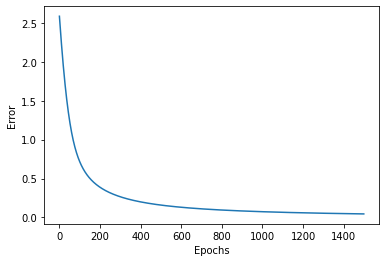

In [4]:
# Train the model using the training data

# Use batch gradient descent to find the optimal weights of the sigmoid function
# Experiment with different learning rates
# Run it for 1500 iterations.  You may change the number of iterations as you see fit.

# Initialization
nu = 0.01
MAX_EPOCHS = 1500
J_vec = []

# The rest of initialization ...

zz = np.ones((len(train_data),1))
X_train = np.concatenate((zz,train_data), axis=1)  # 90x5
y_train = train_label.reshape(len(train_label),1)  # 90x1
#print ('Xshape=', X.shape, 'yshape=', y.shape)
w = np.random.rand(5,1)
w0 = w[0]; w1 = w[1]; w2 = w[2]; w3 = w[3]; w4 = w[4]
N = len(y_train)

# Loop for 1500 epochs
for itr in range (0, MAX_EPOCHS):

    # TO DO: write the update equation
    #   X_train is 90x5; the first column is all 1's
    #     1st feature of the first observation (1st row, 2nd column): X_train[0,1]
    #     4th feature of the second observation (2nd row, 4th column): X_train[1,4]
    #   y_train is 90x1
    #     the label of the first observation (1st row): y_train[0]
    #     the label of the seventh observation (7th row): y_train[6]
    #
    #  You may want to use np.exp and np.log in your computation
    for i in range(0,len(X_train)):
        sigmoid_f = 1/(1+(np.exp(-(w0*X_train[i][0] + w1*X_train[i][1] + w2*X_train[i][2] + w3*X_train[i][3] + w4*X_train[i][4]))))

        w0 = w0 - nu * (sum((sigmoid_f-y_train[i])*X_train[i][0]))/N
        w1 = w1 - nu * (sum((sigmoid_f-y_train[i])*X_train[i][1]))/N
        w2 = w2 - nu * (sum((sigmoid_f-y_train[i])*X_train[i][2]))/N
        w3 = w3 - nu * (sum((sigmoid_f-y_train[i])*X_train[i][3]))/N
        w4 = w4 - nu * (sum((sigmoid_f-y_train[i])*X_train[i][4]))/N        
   
    # TO DO: compute cost function J
        cost_f = -(sum((y_train[i]*np.log(sigmoid_f))+((1-y_train[i])*np.log(1-sigmoid_f))))
  
  
    ## Collect the cost function result from each epoch to generate a plot
    J_vec.append(cost_f)   # 1500x1
    
  
# Plot cost function vs iterations
plt.plot(J_vec)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [5]:
print(cost_f)

0.045530188355704763


In [6]:
# Now use the test set to test the model

# Print the actual and predicted class labels
# Print the average accuracy

correct_class_cnt = 0
for i in range (0, len(test_data)):
    
    # TO DO: 
    # Compute the sigmoid function for each test data and optimal weights
    # Find the predicted label y_hat based on threshold = 0.5
    # 
    # test_data = 10x5, the first column is all 1's
    #   1st feature of the first observation (1st row, 1st column): test_data[0,1]
    #   4th feature of the second observation (2nd row, 3th column): test_data[1,4]
    #
    #   test_label is 10x1
    #   the label of the first observation (1st row): test_label[0]
    #   the label of the seventh observation (7th row): test_label[6]
    sigmoid_f = 1/(1+(np.exp(-(w0*test_data[i][0] + w1*test_data[i][1] + w2*test_data[i][2] + w3*test_data[i][3] + w4*test_data[i][4]))))
    if sigmoid_f <=0.5:
        y_hat = 0.0
    else:
        y_hat = 1.0
        
        
    ### Check accuracy
    print('y={}, y_hat={}'.format(test_label[i], y_hat))
    if (y_hat == test_label[i]):
        correct_class_cnt += 1

print('Average accuracy = {0:2f}'.format(correct_class_cnt/10))


y=1.0, y_hat=1.0
y=1.0, y_hat=1.0
y=0.0, y_hat=0.0
y=1.0, y_hat=1.0
y=0.0, y_hat=0.0
y=1.0, y_hat=1.0
y=0.0, y_hat=0.0
y=0.0, y_hat=0.0
y=0.0, y_hat=0.0
y=1.0, y_hat=1.0
Average accuracy = 1.000000


In [7]:
# Print the optimal weights
print(w0, w1, w2, w3, w4)

[-0.02090624] [-1.14391237] [0.51794068] [-1.78585906] [-0.49295543]
